# Introducción

# Preprocesamiento y exploración de datos

## Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `personal.csv` — información del contrato;
    - `customerID` - id del cliente
    - `BeginDate`
    - `EndDate`
    - `Type`
    - `PaperlessBilling`
    - `PaymentMethod`
    - `MonthlyCharges`
    - `TotalCharges`
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

- **Objetivo**: `EndDate` = `'No'`


## Importacíon de librerías

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Librería para seccionar modelo
from sklearn.model_selection import train_test_split

# Librería para escalado de modelo
from sklearn.preprocessing import StandardScaler

# Librería para barajar los datos
from sklearn.utils import shuffle

# Librerías de modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Librerías para pruebas
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [129]:
# Funciones
from functions.functions import df_explore
from functions.functions import df_error_checking

## Exploración de datos

In [130]:
contract = pd.read_csv('datasets/contract.csv')
personal = pd.read_csv('datasets/personal.csv')
internet = pd.read_csv('datasets/internet.csv')
phone = pd.read_csv('datasets/phone.csv')

In [131]:
df_explore(contract)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

Primeras filas del DataFrame:
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No  

In [132]:
df_explore(personal)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB

Primeras filas del DataFrame:
   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No

Descripción estadística:
        customerID gender  SeniorCitizen Partner Dependents
count         7043   7043    7043.000000    7043       7043
u

In [133]:
df_explore(internet)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB

Primeras filas del DataFrame:
   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW         

In [134]:
df_explore(phone)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB

Primeras filas del DataFrame:
   customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes

Descripción estadística:
        customerID MultipleLines
count         6361          6361
unique        6361             2
top     5575-GNVDE            No
freq             1          3390


## Revisión de datos

### contract DF

In [135]:
df_error_checking(contract)

Columnas con valores ausentes: customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Filas totalmente duplicadas: 0

Duplicados en columna customerID: 0


In [136]:
contract['ClientLeft'] = np.where(contract['EndDate'] == 'No', 0, 1)

In [137]:
print(contract[contract['TotalCharges'].isnull()])

Empty DataFrame
Columns: [customerID, BeginDate, EndDate, Type, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, ClientLeft]
Index: []


In [144]:
contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], errors='coerce')
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')

In [145]:
print(contract['ClientLeft'].value_counts(dropna=False).sort_index())

ClientLeft
0    5174
1    1869
Name: count, dtype: int64


In [ ]:
contract.drop(['PaperlessBilling','PaymentMethod'],axis=1)

,customerID,BeginDate,EndDate,Type,MonthlyCharges,TotalCharges,ClientLeft
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,29.85,29.85,0
1,5575-GNVDE,2017-04-01,NaT,One year,56.95,1889.50,0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,53.85,108.15,1
3,7795-CFOCW,2016-05-01,NaT,One year,42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,70.70,151.65,1
...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,NaT,One year,84.80,1990.50,0
7039,2234-XADUH,2014-02-01,NaT,One year,103.20,7362.90,0
7040,4801-JZAZL,2019-03-01,NaT,Month-to-month,29.60,346.45,0
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,74.40,306.60,1


In [ ]:
print(contract[contract['TotalCharges'].isnull()])

      customerID  BeginDate EndDate      Type PaperlessBilling  \
488   4472-LVYGI 2020-02-01     NaT  Two year              Yes   
753   3115-CZMZD 2020-02-01     NaT  Two year               No   
936   5709-LVOEQ 2020-02-01     NaT  Two year               No   
1082  4367-NUYAO 2020-02-01     NaT  Two year               No   
1340  1371-DWPAZ 2020-02-01     NaT  Two year               No   
3331  7644-OMVMY 2020-02-01     NaT  Two year               No   
3826  3213-VVOLG 2020-02-01     NaT  Two year               No   
4380  2520-SGTTA 2020-02-01     NaT  Two year               No   
5218  2923-ARZLG 2020-02-01     NaT  One year              Yes   
6670  4075-WKNIU 2020-02-01     NaT  Two year               No   
6754  2775-SEFEE 2020-02-01     NaT  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges  ClientLeft  
488   Bank transfer (automatic)           52.55           NaN           0  
753                Mailed check           20.25        

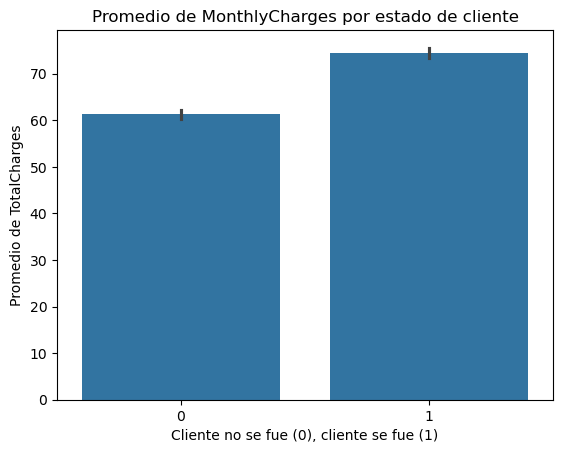

In [155]:
# Gráfico
sns.barplot(x='ClientLeft', y='MonthlyCharges', data=contract)
plt.title('Promedio de MonthlyCharges por estado de cliente')
plt.xlabel('Cliente no se fue (0), cliente se fue (1)')
plt.ylabel('Promedio de TotalCharges')
plt.show()

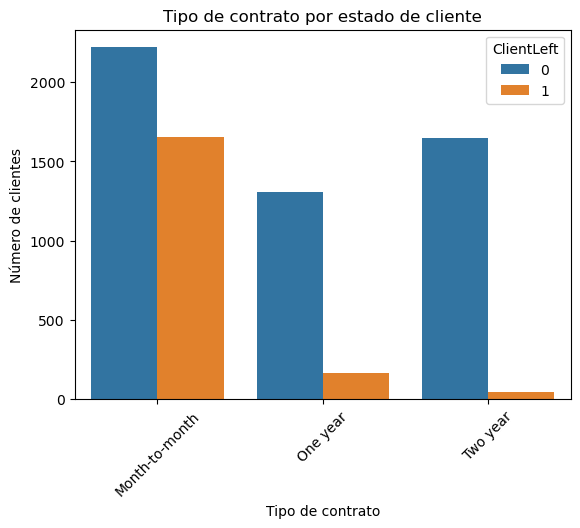

In [152]:
sns.countplot(x='Type', hue='ClientLeft', data=contract)
plt.title('Tipo de contrato por estado de cliente')
plt.xlabel('Tipo de contrato')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='BeginDate'>

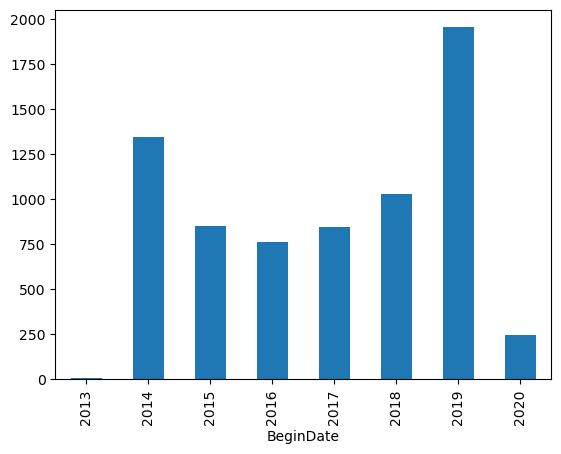

In [ ]:
contract['BeginDate'].dt.year.value_counts().sort_index().plot(kind='bar')

### personal DF

In [ ]:
df_error_checking(personal)

Columnas con valores ausentes: customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Filas totalmente duplicadas: 0

Duplicados en columna customerID: 0


### internet

In [ ]:
df_error_checking(internet)

Columnas con valores ausentes: customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Filas totalmente duplicadas: 0

Duplicados en columna customerID: 0


### phone

In [ ]:
df_error_checking(phone)

Columnas con valores ausentes: customerID       0
MultipleLines    0
dtype: int64

Filas totalmente duplicadas: 0

Duplicados en columna customerID: 0


cambiar tipo de datos de fechas
eliminar columna paperlessbilling y paymentmethod

Eliminación de atributos innecesarios y datos irrelevantes, corrección de valores ausentes y filas duplicadas.

## Enriquecimiento de datos

In [158]:
df = contract.merge(personal, on='customerID', how='left')
df = df.merge(internet,on='customerID', how = 'left')
df = df.merge(phone, on='customerID', how = 'left')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   ClientLeft        7043 non-null   int64         
 9   gender            7043 non-null   object        
 10  SeniorCitizen     7043 non-null   int64         
 11  Partner           7043 non-null   object        
 12  Dependents        7043 non-null   object        
 13  InternetService   5517 non-null   object        
 14  OnlineSecurity    5517 n

### Resumen

Resumen de pasos realizados en la etapa de procesamiento y exploración de datos

# Modelado de datos

## Funciones

Creación de funciones que se vayan a utilizar constantemente en los modelos.

## Separación de datasets

Training, valid y test.

## Modelos


### Análisis de Resultados del modelos

# Resumen y conclusiones finales